In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
movie_stats = pd.read_csv("resources/u.data", sep = '\t', names = ["user", "item_id", "rating","timestamp"])

In [25]:
movie_stats.head()

,user,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [26]:
movie_data = pd.read_csv("resources/Movie_Id_Titles")

## lets merge the data frames together to add the titles in

In [27]:
movie_data.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [28]:
df = pd.merge(movie_stats,movie_data, on="item_id")

In [30]:
df.head()

,user,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


### let eveluate the data by the movie titles, ratings, and number or ratings

In [32]:
df.groupby("title")["rating"].mean().head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

## number of ratings

In [37]:
df.groupby("title")["rating"].count().head()

title
'Til There Was You (1997)      9
1-900 (1994)                   5
101 Dalmatians (1996)        109
12 Angry Men (1957)          125
187 (1997)                    41
Name: rating, dtype: int64

### lets combine these to make a df ouf of these important values 

In [38]:
ave_rating_per_movie = pd.DataFrame(df.groupby('title')["rating"].mean())

In [40]:
ave_rating_per_movie["number or ratings"] = df.groupby('title')["rating"].count()

In [42]:
ave_rating_per_movie.head()

,rating,number or ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


## lets look at these through some visualization

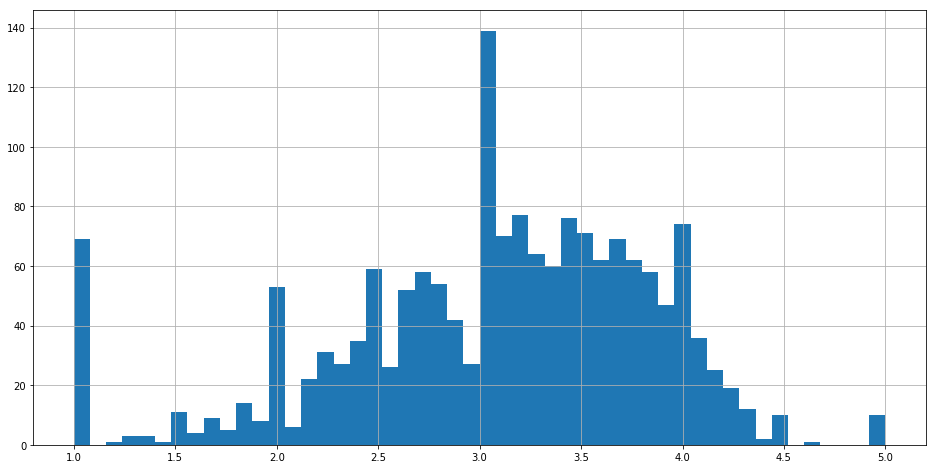

In [44]:
ave_rating_per_movie["rating"].hist(figsize= (16,8), bins = 50)

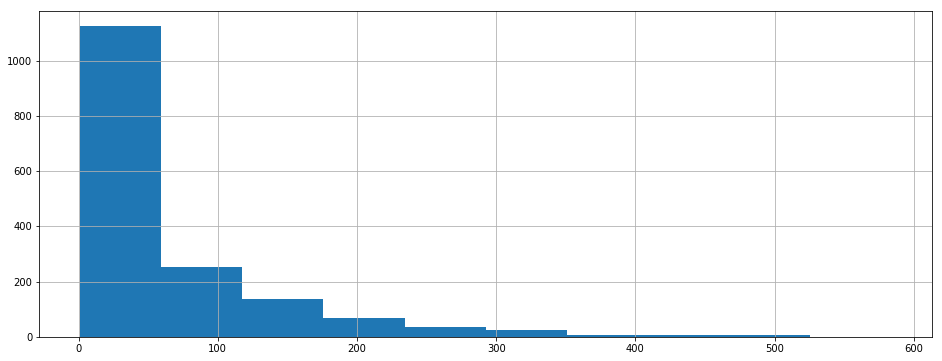

In [45]:
ave_rating_per_movie["number or ratings"].hist(figsize =(16,6))

## correlaiton betwrrn rting and number of ratings. More ratings the higher the ratings

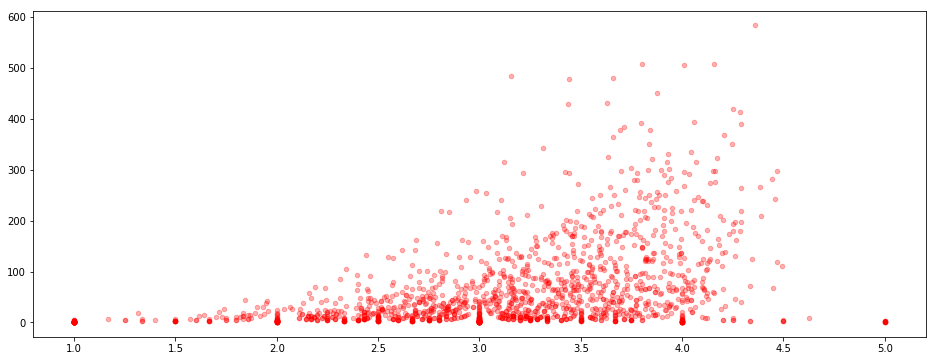

In [50]:
plt.figure(figsize=(16,6))
plt.scatter(ave_rating_per_movie["rating"], ave_rating_per_movie["number or ratings"], s = 20, alpha=0.3, c = "r")

## to set up our recommendation we need to consider the overall ratings per user for each movie. Since not all users would have see each move we will take that into considerations

In [51]:
movie_matrix = df.pivot_table(index="user", columns="title", values="rating")

In [53]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Lets take into consideration we are recommending movies if a user has watches Starwars or Liar Liar 

In [54]:
stars_wars_and_ratings = movie_matrix["Star Wars (1977)"]
liar_liar_and_ratings = movie_matrix["Liar Liar (1997)"]

In [56]:
stars_wars_and_ratings.head()

user
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [58]:
liar_liar_and_ratings.head()

user
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

## Lets see how the ratings of  starwars relate to the ratings of all other movies

In [59]:
similar_to_star_Wars = movie_matrix.corrwith(stars_wars_and_ratings)

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [60]:
similar_to_star_Wars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

## LiarLiar

In [61]:
similiar_to_liar = movie_matrix.corrwith(liar_liar_and_ratings)

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [62]:
similiar_to_liar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

## LEts connvert these to a data frame so we can work with recommendating movies to a user

In [63]:
starWars_Correlation = pd.DataFrame(similar_to_star_Wars, columns=["Correlation"])

In [68]:
starWars_Correlation.dropna(inplace=True)

### Looks like there is perfect correlation to starwars which is not accurate. This will have to be related to the number of reviews for each title so will add these to the df

In [71]:
starWars_Correlation = starWars_Correlation.join(ave_rating_per_movie["number or ratings"])

In [77]:
starWars_Correlation[starWars_Correlation["number or ratings"] > 100].sort_values("Correlation", ascending = False).head(10)

,Correlation,number or ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


## Lets take a look at liar liar

In [78]:
corr_liar = pd.DataFrame(similiar_to_liar, columns=["Correlation"])

In [79]:
corr_liar.dropna(inplace=True)

In [81]:
corr_liar = corr_liar.join(ave_rating_per_movie["number or ratings"])

In [85]:
corr_liar[corr_liar["number or ratings"] > 100].sort_values("Correlation", ascending = False).head()

,Correlation,number or ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
